In [4]:
# Setup: Load required packages
options(dplyr.summarise.inform = FALSE)
library(tidyverse)
library(mlba)

---

## Part 1: Data Summaries — Understanding Your Data

### 🏢 Business Context

Before any analysis, you must **know your data**. Summary statistics answer critical questions:

| Stakeholder Question | Statistic | Business Insight |
|---------------------|-----------|------------------|
| "What's typical?" | Mean, Median | Central tendency, expected value |
| "How variable is it?" | SD, Range | Risk, volatility, consistency |
| "Are there extremes?" | Min, Max | Outliers, edge cases |
| "Is data complete?" | Missing count | Data quality issues |

### Example 1: Boston House Prices

We'll analyze the Boston Housing dataset — used by real estate companies, banks, and urban planners.

In [5]:
boston.housing.df <- mlba::BostonHousing
head(boston.housing.df, 9)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT.MEDV
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0


In [6]:
summary(boston.housing.df)

      CRIM                ZN             INDUS            CHAS        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      NOX               RM             AGE              DIS        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      RAD              TAX 

### 📊 DETAILED INTERPRETATION GUIDE: Reading the summary() Output

The `summary()` function provides a **six-number summary** for each numeric variable. Here's how to read every element:

---

#### What You See (Example Output):

```
      CRIM               ZN             INDUS            CHAS        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.0000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.0000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.0000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.0691  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.0000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.0000  
```

---

#### Row-by-Row Explanation:

| Row | What It Means | How to Use It |
|-----|---------------|---------------|
| **Min.** | Smallest value in the data | Check for data errors (negative values where shouldn't be?) |
| **1st Qu.** | 25th percentile (Q1) | 25% of values are below this |
| **Median** | 50th percentile (middle value) | "Typical" value, robust to outliers |
| **Mean** | Average of all values | Sensitive to extreme values |
| **3rd Qu.** | 75th percentile (Q3) | 75% of values are below this |
| **Max.** | Largest value in the data | Check for outliers or data errors |

---

#### Key Diagnostic Patterns:

```
PATTERN 1: Mean ≈ Median
─────────────────────────
Example: Mean = 50, Median = 48
Interpretation: Symmetric distribution (normal-ish)
Action: Safe to use mean as "typical" value

PATTERN 2: Mean >> Median  
─────────────────────────
Example: Mean = 100, Median = 45
Interpretation: RIGHT-SKEWED (few very HIGH values pulling mean up)
Common in: Income, property values, sales
Action: Use MEDIAN as "typical" value, not mean

PATTERN 3: Mean << Median
─────────────────────────
Example: Mean = 30, Median = 65
Interpretation: LEFT-SKEWED (few very LOW values pulling mean down)
Common in: Age at death, test scores with ceiling
Action: Use MEDIAN as "typical" value
```

---

#### Using the Interquartile Range (IQR):

```
IQR = Q3 - Q1 = Middle 50% of data

Outlier Detection Rule:
• Value < Q1 - 1.5×IQR → Potential LOW outlier
• Value > Q3 + 1.5×IQR → Potential HIGH outlier

Example:
Q1 = 0.08, Q3 = 3.68, IQR = 3.60
Lower fence = 0.08 - 1.5(3.60) = -5.32
Upper fence = 3.68 + 1.5(3.60) = 9.08

Any CRIM value > 9.08 is a potential outlier!
```

---

#### Business Application Example:

```
Variable: Customer Purchase Amount

Min.   :   $5.00    ← Minimum purchase (gift card?)
1st Qu.:  $45.00    ← Budget shoppers spend up to $45
Median :  $78.00    ← Typical customer spends ~$78
Mean   : $125.00    ← Average is higher (pulled up by big spenders)
3rd Qu.: $142.00    ← Most customers spend under $142
Max.   :$2,500.00   ← Biggest purchase (VIP customer? Data error?)

INSIGHT: Mean ($125) >> Median ($78) indicates right-skewed data.
         Report MEDIAN ($78) as "typical" purchase to stakeholders.
         The $2,500 max warrants investigation (legitimate VIP or error?).
```

---

#### Quick Reference:

```
┌────────────────────────────────────────────────────────────┐
│              SUMMARY() QUICK REFERENCE                      │
├────────────────────────────────────────────────────────────┤
│                                                             │
│  Min/Max → Check for impossible values (data quality)      │
│  Mean vs Median → Check for skewness                       │
│  Q1 to Q3 → Middle 50% of your data (the "typical" range)  │
│                                                             │
│  If Mean ≈ Median → Symmetric, use mean                    │
│  If Mean ≠ Median → Skewed, use median                     │
│                                                             │
└────────────────────────────────────────────────────────────┘
```

### 📋 Interpreting `summary()` Output

**For each variable, you see:**
- **Min/Max**: Range of values (detect outliers)
- **1st Quartile (Q1)**: 25% of values are below this
- **Median**: Middle value (50th percentile) — robust to outliers
- **Mean**: Average — sensitive to extreme values
- **3rd Quartile (Q3)**: 75% of values are below this

**Business insight**: If Mean >> Median → right-skewed (few very high values). Common in income, property values.

### Computing Individual Statistics

For detailed analysis of a single variable:

In [7]:
# compute mean, standard dev., min, max, median, length, and missing values of CRIM
mean(boston.housing.df$CRIM)
sd(boston.housing.df$CRIM)
min(boston.housing.df$CRIM)
max(boston.housing.df$CRIM)
median(boston.housing.df$CRIM)
length(boston.housing.df$CRIM)

# find the number of missing values of variable CRIM
sum(is.na(boston.housing.df$CRIM))

[1] 3.613524

[1] 8.601545

[1] 0.00632

[1] 88.9762

[1] 0.25651

[1] 506

[1] 0

### 📋 Understanding Standard Deviation (SD)

**SD** measures **spread** or **variability**:
- Low SD → Values cluster tightly around mean (consistent, predictable)
- High SD → Values widely dispersed (high variability, risk)

**Business example**: 
- Product quality with SD = 0.1 → Very consistent
- Stock returns with SD = 30% → Very volatile (risky)

### Computing Statistics for All Variables

Create a comprehensive summary table:

In [8]:
# compute mean, standard dev., min, max, median, length, and missing values for all variables
data.frame(mean=sapply(boston.housing.df, mean),
           sd=sapply(boston.housing.df, sd),
           min=sapply(boston.housing.df, min),
           max=sapply(boston.housing.df, max),
           median=sapply(boston.housing.df, median),
           length=sapply(boston.housing.df, length),
           miss.val=sapply(boston.housing.df,
                           function(x) sum(length(which(is.na(x))))))

,mean,sd,min,max,median,length,miss.val
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
CRIM,3.61352356,8.6015451,0.00632,88.9762,0.25651,506,0
ZN,11.36363636,23.3224530,0.00000,100.0000,0.00000,506,0
INDUS,11.13677866,6.8603529,0.46000,27.7400,9.69000,506,0
CHAS,0.06916996,0.2539940,0.00000,1.0000,0.00000,506,0
NOX,0.55469506,0.1158777,0.38500,0.8710,0.53800,506,0
RM,6.28463439,0.7026171,3.56100,8.7800,6.20850,506,0
AGE,68.57490119,28.1488614,2.90000,100.0000,77.50000,506,0
DIS,3.79504269,2.1057101,1.12960,12.1265,3.20745,506,0
RAD,9.54940711,8.7072594,1.00000,24.0000,5.00000,506,0


### 📋 How to Use This Summary Table

**For each row (variable), check:**
1. **miss.val**: Any missing values? (Needs imputation?)
2. **min/max**: Extreme values? (Outliers? Data errors?)
3. **sd**: High variability? (May dominate model if not scaled)
4. **mean vs. median**: Large difference? (Skewed distribution?)

### Correlation Matrix

Understand relationships between variables:

In [9]:
round(cor(boston.housing.df),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT.MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46,-0.39,-0.15
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41,0.36,0.37
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60,-0.48,-0.37
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05,0.18,0.11
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59,-0.43,-0.23
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61,0.70,0.64
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60,-0.38,-0.19
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50,0.25,0.12
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49,-0.38,-0.20
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54,-0.47,-0.27


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the ggcorrplot package.
  Please report the issue at <https://github.com/kassambara/ggcorrplot/issues>.”


agg_record_1037715221 
                    2

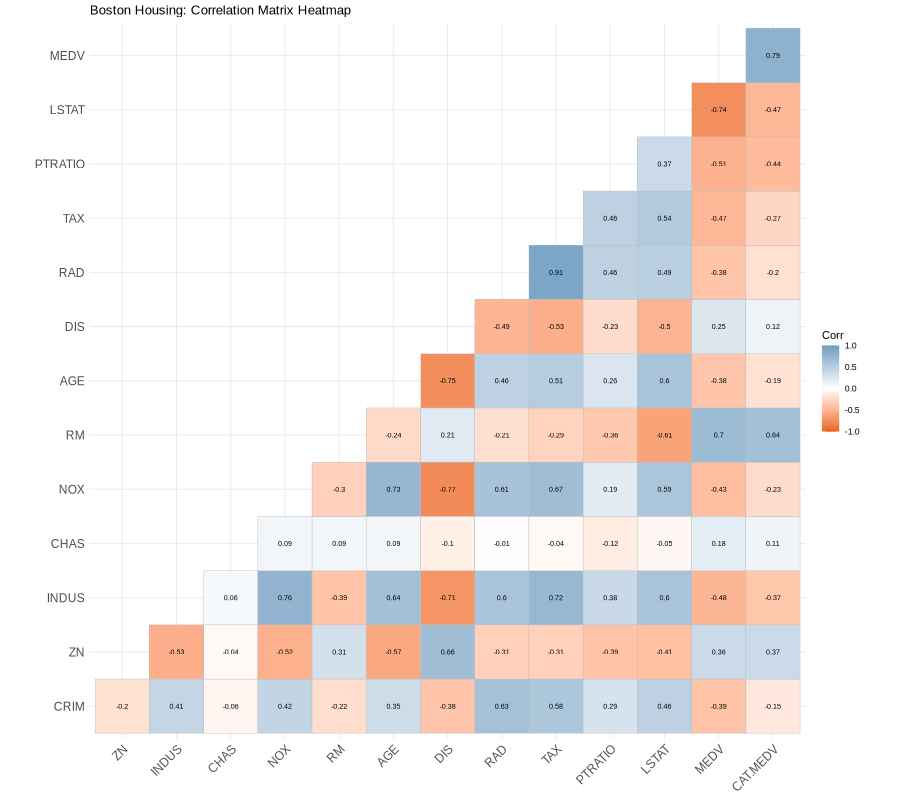

In [10]:
# Colored Correlation Matrix Heatmap
# Install and load ggcorrplot for visualization
if (!require(ggcorrplot)) install.packages("ggcorrplot", repos = "https://cloud.r-project.org/")
library(ggcorrplot)
library(IRdisplay)

# Calculate correlation matrix
corr_matrix <- cor(boston.housing.df)

# Create colored heatmap with correlation values
p <- ggcorrplot(corr_matrix, 
                type = "lower",           # Show lower triangle only
                lab = TRUE,               # Display correlation values
                lab_size = 2.5,           # Size of value labels
                colors = c("#E46726", "white", "#6D9EC1"),  # Red-White-Blue gradient
                title = "Boston Housing: Correlation Matrix Heatmap",
                ggtheme = theme_minimal())

# Save and display as PNG for proper rendering
png("correlation_heatmap.png", width = 900, height = 800)
print(p)
dev.off()
display_png(file = "correlation_heatmap.png")

### 📊 DETAILED INTERPRETATION GUIDE: Reading the Correlation Matrix

The correlation matrix shows **pairwise relationships** between ALL variables. Understanding how to read it is essential for identifying multicollinearity and variable relationships.

---

#### What You See (Example Output):

```
        CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX PTRATIO    B LSTAT  MEDV
CRIM    1.00 -0.20  0.41 -0.06  0.42 -0.22  0.35 -0.38  0.63  0.58   0.29 -0.39  0.46 -0.39
ZN     -0.20  1.00 -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31  -0.39  0.18 -0.41  0.36
INDUS   0.41 -0.53  1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72   0.38 -0.36  0.60 -0.48
...
```

---

#### How to Read the Matrix:

```
READING A CORRELATION VALUE:

Row = First variable
Column = Second variable
Cell value = Correlation coefficient (r)

Example: cor(CRIM, RAD) = 0.63
         "Crime rate and accessibility to highways
          have a moderately strong positive relationship"
```

---

#### Correlation Strength Guide:

| r Value | Strength | Interpretation |
|---------|----------|----------------|
| **0.90 to 1.00** | Very strong positive | Almost identical movement |
| **0.70 to 0.89** | Strong positive | Variables move closely together |
| **0.40 to 0.69** | Moderate positive | Notable relationship |
| **0.10 to 0.39** | Weak positive | Slight tendency to move together |
| **-0.10 to 0.10** | No correlation | Variables are independent |
| **-0.39 to -0.10** | Weak negative | Slight inverse tendency |
| **-0.69 to -0.40** | Moderate negative | Notable inverse relationship |
| **-0.89 to -0.70** | Strong negative | Variables move opposite |
| **-1.00 to -0.90** | Very strong negative | Almost perfect inverse |

---

#### Step-by-Step Interpretation:

**Step 1: Look at the diagonal**
```
The diagonal is ALWAYS 1.00 (variable correlates perfectly with itself)
This is your sanity check that the matrix is correct.
```

**Step 2: Scan for HIGH positive correlations (> 0.70)**
```
HIGH POSITIVE CORRELATIONS IN THIS DATA:
• INDUS ↔ NOX = 0.76 (Industry and pollution)
• INDUS ↔ TAX = 0.72 (Industry and property tax)
• RAD ↔ TAX = 0.91 (Highway access and tax) ⚠️ VERY HIGH!

INTERPRETATION: RAD and TAX are nearly redundant!
ACTION: Consider removing one before regression.
```

**Step 3: Scan for HIGH negative correlations (< -0.70)**
```
HIGH NEGATIVE CORRELATIONS:
• DIS ↔ INDUS = -0.71 (Distance from employment centers and industry)
• DIS ↔ NOX = -0.77 (Distance and pollution)
• DIS ↔ AGE = -0.75 (Distance and housing age)

INTERPRETATION: Areas far from employment have less industry,
               less pollution, and newer housing.
```

**Step 4: Check correlations with your TARGET variable**
```
If predicting MEDV (home values), check its correlations:
• LSTAT ↔ MEDV = -0.74 (Lower status % → Lower home values)
• RM ↔ MEDV = 0.70 (More rooms → Higher home values)

BEST PREDICTORS: Variables with highest |r| with target
```

---

#### Multicollinearity Warning Signs:

```
⚠️ MULTICOLLINEARITY DETECTED:

When two PREDICTOR variables have r > 0.80:
┌─────────────────────────────────────────────────────────┐
│ RAD ↔ TAX = 0.91                                       │
│                                                         │
│ PROBLEM: Both measure similar underlying concept        │
│          (urban development/tax burden)                 │
│                                                         │
│ CONSEQUENCE: Regression coefficients become unstable    │
│              Standard errors inflate                    │
│              Hard to interpret individual effects       │
│                                                         │
│ SOLUTIONS:                                              │
│ 1. Remove one variable                                  │
│ 2. Combine into single index                           │
│ 3. Use PCA to create orthogonal components             │
│ 4. Use regularization (Ridge/Lasso regression)         │
└─────────────────────────────────────────────────────────┘
```

---

#### Visual Pattern Recognition:

```
SYMMETRIC MATRIX:
The matrix is symmetric around the diagonal.
cor(A,B) = cor(B,A)

Only need to read UPPER or LOWER triangle, not both!

        A    B    C    D
    A  1.0  0.5  0.3 -0.2   ← Read this row
    B  0.5  1.0  0.8  0.1     OR
    C  0.3  0.8  1.0 -0.4     this column
    D -0.2  0.1 -0.4  1.0     (same info)
```

---

#### Business Application Example:

```
Customer Analytics Correlation Matrix:

              Purchases  Visits  Time_on_Site  Returns  Satisfaction
Purchases        1.00     0.72        0.45      -0.35        0.68
Visits           0.72     1.00        0.85      -0.12        0.41
Time_on_Site     0.45     0.85        1.00      -0.08        0.32
Returns         -0.35    -0.12       -0.08       1.00       -0.78
Satisfaction     0.68     0.41        0.32      -0.78        1.00

KEY INSIGHTS:
1. Visits ↔ Time_on_Site = 0.85 → Highly redundant, keep only one
2. Returns ↔ Satisfaction = -0.78 → Returns strongly hurt satisfaction
3. Purchases ↔ Satisfaction = 0.68 → Happy customers buy more
```

---

#### Quick Reference:

```
┌────────────────────────────────────────────────────────────┐
│         CORRELATION MATRIX QUICK REFERENCE                  │
├────────────────────────────────────────────────────────────┤
│                                                             │
│  Diagonal = 1.00 always (self-correlation)                 │
│  Matrix is symmetric (only read half)                      │
│                                                             │
│  |r| > 0.70 with TARGET → Good predictor                   │
│  |r| > 0.80 between PREDICTORS → Multicollinearity!        │
│  |r| < 0.10 → Variables are independent                    │
│                                                             │
│  POSITIVE r → Variables increase together                  │
│  NEGATIVE r → One increases, other decreases               │
│                                                             │
└────────────────────────────────────────────────────────────┘
```

### 📋 Interpreting Correlations

| Correlation | Interpretation | Action |
|-------------|----------------|--------|
| **r ≈ +1.0** | Perfect positive relationship | Variables are redundant |
| **r ≈ +0.7 to +0.9** | Strong positive | Consider removing one (multicollinearity) |
| **r ≈ 0** | No linear relationship | Variables are independent |
| **r ≈ -0.7 to -1.0** | Strong negative | Inverse relationship |

**Business insight**: If two variables correlate at r > 0.9, they measure nearly the same thing. Keep only one to avoid redundancy.

---

## Part 2: Aggregation and Pivot Tables

### 🏢 Business Context: Slicing and Dicing Data

Aggregation answers questions like:
- "What's the average sale price **by region**?"
- "How does customer satisfaction vary **by product and store**?"
- "What are total revenues **by quarter and product line**?"

### Frequency Tables

Count observations in each category:

In [11]:
table(boston.housing.df$CHAS)


  0   1 
471  35 

In [12]:
# tidyverse version
boston.housing.df %>% count(CHAS)

CHAS,n
<int>,<int>
0,471
1,35


### 📋 Interpreting Frequency Tables

**CHAS** indicates whether the tract bounds the Charles River:
- **0**: Does not bound river (majority)
- **1**: Bounds river (minority)

**Business use**: Check for class imbalance before modeling (remember Module 1.1!).

### Creating Bins for Continuous Variables

Convert continuous data into categories for easier interpretation:

In [13]:
# create bins of size 1 for number of rooms (RM)
boston.housing.df <- boston.housing.df %>%
  mutate(RM.bin = cut(RM, c(1:9), labels=FALSE))

head(boston.housing.df %>% select(RM, RM.bin))

,RM,RM.bin
,<dbl>,<int>
1,6.575,6
2,6.421,6
3,7.185,7
4,6.998,6
5,7.147,7
6,6.430,6


### Two-Way Aggregation: Pivot Tables

Compute averages across multiple dimensions:

In [14]:
# compute the average of MEDV by (binned) RM and CHAS
# in aggregate() use the argument by= to define the list of aggregating variables,
# and FUN= as an aggregating function.
aggregate(boston.housing.df$MEDV, by=list(RM=boston.housing.df$RM.bin,
          CHAS=boston.housing.df$CHAS), FUN=mean)

RM,CHAS,x
<int>,<int>,<dbl>
3,0,25.30000
4,0,15.40714
5,0,17.20000
6,0,21.76917
7,0,35.96444
8,0,45.70000
5,1,22.21818
6,1,25.91875
7,1,44.06667


In [15]:
# tidyverse version (cleaner syntax)
boston.housing.df %>%
  group_by(RM.bin, CHAS) %>%
  summarise(mean(MEDV))

RM.bin,CHAS,mean(MEDV)
<int>,<int>,<dbl>
3,0,25.30000
4,0,15.40714
5,0,17.20000
5,1,22.21818
6,0,21.76917
6,1,25.91875
7,0,35.96444
7,1,44.06667
8,0,45.70000


### 📋 Interpreting Pivot Tables

**What this shows**:
- Each row = combination of RM.bin and CHAS
- `mean(MEDV)` = average median home value for that group

**Business insight**: 
- More rooms → Higher median value (as expected)
- River proximity (CHAS=1) → Premium pricing

### Creating Cross-Tabulated Pivot Tables

Use `reshape` package for traditional Excel-style pivot tables:

In [16]:
library(reshape)
boston.housing.df <- mlba::BostonHousing
# create bins of size 1
boston.housing.df <- boston.housing.df %>%
  mutate(RM.bin = cut(RM, c(1:9), labels=FALSE))

# use melt() to stack a set of columns into a single column of data.
# stack MEDV values for each combination of (binned) RM and CHAS
mlt <- melt(boston.housing.df, id=c("RM.bin", "CHAS"), measure=c("MEDV"))
head(mlt, 5)


Attaching package: ‘reshape’


The following object is masked from ‘package:lubridate’:

    stamp


The following object is masked from ‘package:dplyr’:

    rename


The following objects are masked from ‘package:tidyr’:

    expand, smiths




,RM.bin,CHAS,variable,value
,<int>,<int>,<fct>,<dbl>
1,6,0,MEDV,24.0
2,6,0,MEDV,21.6
3,7,0,MEDV,34.7
4,6,0,MEDV,33.4
5,7,0,MEDV,36.2


In [17]:
# use cast() to reshape data and generate pivot table
cast(mlt, RM.bin ~ CHAS, subset=variable=="MEDV",
     margins=c("grand_row", "grand_col"), mean)

,RM.bin,0,1,(all)
,<fct>,<dbl>,<dbl>,<dbl>
1,3,25.30000,NaN,25.30000
2,4,15.40714,NaN,15.40714
3,5,17.20000,22.21818,17.55159
4,6,21.76917,25.91875,22.01599
5,7,35.96444,44.06667,36.91765
6,8,45.70000,35.95000,44.20000
7,(all),22.09384,28.44000,22.53281


### 📊 DETAILED INTERPRETATION GUIDE: Reading Pivot Tables

Pivot tables are one of the most powerful tools in business analytics. Understanding how to read them is essential for data-driven decision making.

---

#### What You See (Example Output):

```
  RM.bin    0      1  (all)
1      3 13.60     NA 13.60
2      4 17.01  22.50 17.23
3      5 19.71  25.25 20.06
4      6 21.90  28.89 22.45
5      7 33.35  39.50 34.16
6      8 44.20  37.50 43.46
7  (all) 22.09  28.44 22.53
```

---

#### Anatomy of the Pivot Table:

```
             COLUMNS: CHAS (River Proximity)
                    0         1       (all)
            ┌─────────────────────────────────┐
ROWS:       │                                 │
RM.bin   3  │   13.60      NA      13.60     │ ← No 3-room homes near river
(Rooms)  4  │   17.01    22.50    17.23     │
         5  │   19.71    25.25    20.06     │
         6  │   21.90    28.89    22.45     │
         7  │   33.35    39.50    34.16     │
         8  │   44.20    37.50    43.46     │
      (all) │   22.09    28.44    22.53     │ ← Column averages
            └─────────────────────────────────┘
                 ↑         ↑         ↑
            Not near   Near      Overall
             river    river     average
```

---

#### Cell-by-Cell Interpretation:

| Cell Location | Value | Interpretation |
|---------------|-------|----------------|
| Row 5, Col 0 | 19.71 | 5-room homes NOT near river average $19,710 |
| Row 5, Col 1 | 25.25 | 5-room homes NEAR river average $25,250 |
| Row 5, (all) | 20.06 | ALL 5-room homes average $20,060 |
| (all), Col 0 | 22.09 | ALL homes NOT near river average $22,090 |
| (all), Col 1 | 28.44 | ALL homes NEAR river average $28,440 |
| (all), (all) | 22.53 | GRAND AVERAGE of all homes |

---

#### Key Patterns to Look For:

**Pattern 1: Row Effect (RM.bin)**
```
As RM.bin increases (more rooms):
3 → 4 → 5 → 6 → 7 → 8
13.6 → 17.2 → 20.1 → 22.5 → 34.2 → 43.5

FINDING: More rooms = Higher home value
         (Expected pattern confirmed by data)
```

**Pattern 2: Column Effect (CHAS)**
```
Comparing CHAS = 0 vs CHAS = 1:
Not near river: $22,090 average
Near river:     $28,440 average
Difference:     $6,350 premium!

FINDING: River proximity adds ~29% to home value
```

**Pattern 3: Interaction Effect**
```
Does the river premium vary by home size?

        CHAS=0  CHAS=1  Premium
5-room   19.71   25.25   $5,540 (28%)
6-room   21.90   28.89   $6,990 (32%)
7-room   33.35   39.50   $6,150 (18%)

FINDING: River premium is highest for mid-size homes (6 rooms)
         Larger homes may have other amenities that matter more
```

---

#### NA Values in Pivot Tables:

```
⚠️ NA INTERPRETATION:

Row 3, Col 1 = NA

This means: ZERO observations of 3-room homes near the river

POSSIBLE REASONS:
• Small homes rarely built in premium locations
• Sample limitation (not enough data)
• Market characteristic (developers prefer larger homes on river)

ACTION: Note the gap, but don't draw conclusions from missing cells
```

---

#### Margin Rows/Columns Explained:

```
┌──────────────────────────────────────────────────────┐
│                 MARGIN INTERPRETATION                 │
├──────────────────────────────────────────────────────┤
│                                                       │
│  (all) ROW: Average across ALL values of that column │
│             "Overall average for each CHAS category" │
│                                                       │
│  (all) COL: Average across ALL values of that row    │
│             "Overall average for each room category" │
│                                                       │
│  (all)/(all): Grand mean of entire dataset           │
│               "Overall average home value"           │
│                                                       │
└──────────────────────────────────────────────────────┘
```

---

#### Business Decision Framework:

```
USING PIVOT TABLES FOR DECISIONS:

Question: "Should we focus marketing on river properties?"

Analysis from pivot table:
• River properties command 29% premium ($28.4K vs $22.1K)
• Premium exists across all home sizes
• Limited inventory (many NA cells near river)

RECOMMENDATION:
"River properties offer significant price premiums.
Marketing should emphasize river views, but inventory
is limited. Consider targeting mid-size (5-6 room)
river properties for maximum premium capture."
```

---

#### Quick Reference:

```
┌────────────────────────────────────────────────────────────┐
│            PIVOT TABLE QUICK REFERENCE                      │
├────────────────────────────────────────────────────────────┤
│                                                             │
│  ROWS = First grouping variable                            │
│  COLUMNS = Second grouping variable                        │
│  VALUES = Aggregated measure (mean, sum, count, etc.)      │
│                                                             │
│  (all) row/column = Marginal totals/averages               │
│  NA = No observations for that combination                 │
│                                                             │
│  Compare ACROSS rows → Effect of row variable              │
│  Compare ACROSS columns → Effect of column variable        │
│  Compare WITHIN cells → Interaction effects                │
│                                                             │
└────────────────────────────────────────────────────────────┘
```

In [18]:
# tidyverse version (simpler and more readable)
boston.housing.df %>%
  group_by(RM.bin, CHAS) %>%
  summarize(mean=mean(MEDV)) %>%
  spread(CHAS, mean)

RM.bin,0,1
<int>,<dbl>,<dbl>
3,25.30000,NA
4,15.40714,NA
5,17.20000,22.21818
6,21.76917,25.91875
7,35.96444,44.06667
8,45.70000,35.95000


### 📋 Reading Pivot Tables

**Structure**:
- **Rows**: RM.bin (number of rooms category)
- **Columns**: CHAS (0 = no river, 1 = river)
- **Values**: Average MEDV (median home value in $1000s)

**Business application**: This is exactly how you'd analyze:
- Sales by Region × Product Category
- Customer satisfaction by Store × Service Type
- Revenue by Quarter × Sales Channel

---

## Part 3: Reducing Categories in Categorical Variables

### 🏢 Business Context: Simplification for Clarity

Sometimes categorical variables have **too many levels**:
- 50 states → Regions (Northeast, South, Midwest, West)
- 100 product SKUs → Product families
- 20 age groups → Young/Middle/Senior

**Benefits**:
- Easier interpretation for stakeholders
- More stable models (avoid overfitting)
- Clearer visualizations

### Visualizing Category Distributions

agg_record_272451009 
                   2

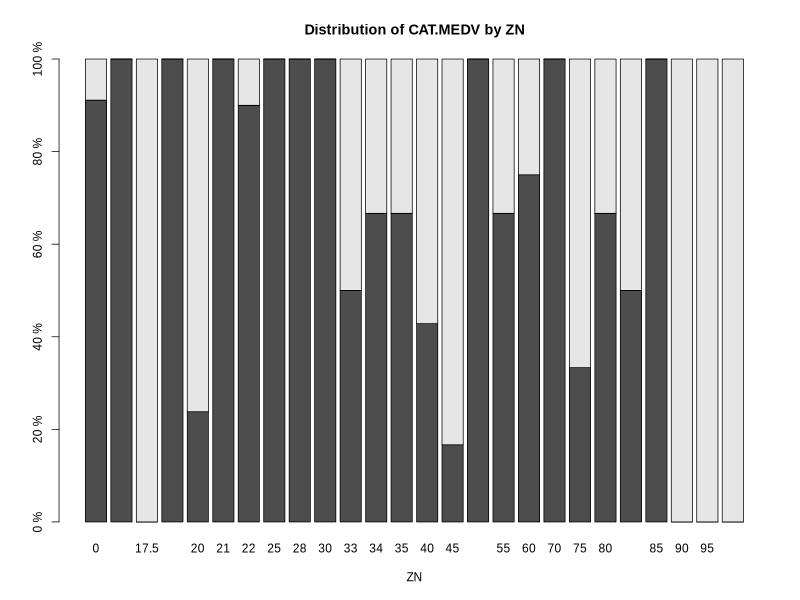

In [19]:
library(IRdisplay)
boston.housing.df <- mlba::BostonHousing

tbl <- table(boston.housing.df$CAT.MEDV, boston.housing.df$ZN)
prop.tbl <- prop.table(tbl, margin=2)

png("cat_medv_barplot.png", width=800, height=600)
barplot(prop.tbl, xlab="ZN", ylab="", yaxt="n",main="Distribution of CAT.MEDV by ZN")
axis(2, at=(seq(0,1, 0.2)), paste(seq(0,100,20), "%"))
dev.off()
display_png(file="cat_medv_barplot.png")

agg_record_585642268 
                   2

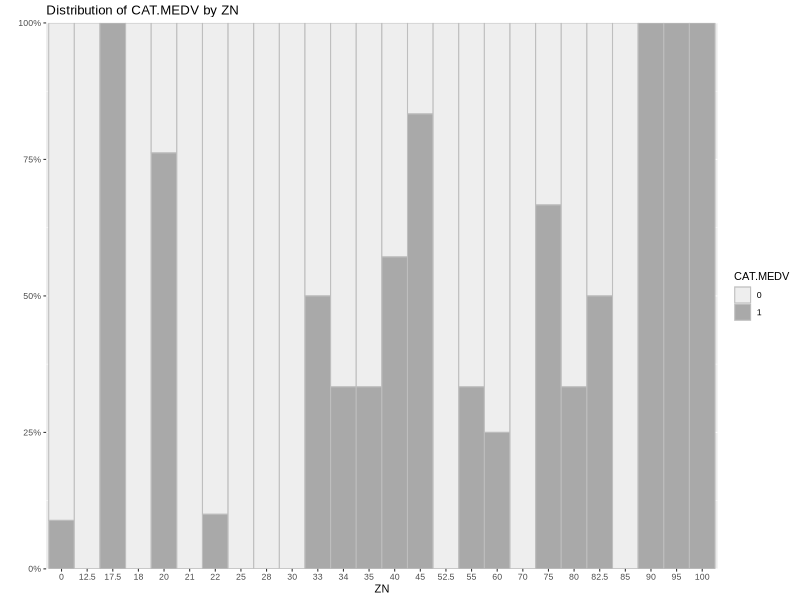

In [20]:
# ggplot2 version (publication quality)
library(tidyverse)
library(IRdisplay)

df <- data.frame(prop.tbl)
g <- ggplot(df, aes(x=Var2, y=Freq, group=Var1, fill=Var1)) +
  geom_bar(stat="identity", color="grey", width=1) +
  scale_y_continuous(labels = scales::percent, expand=expansion()) +
  scale_fill_manual("CAT.MEDV", values=c("0"="#eeeeee", "1"="darkgrey")) +
  labs(x="ZN", y="", title="Distribution of CAT.MEDV by ZN")

png("cat_medv_distribution.png", width=800, height=600)
print(g)
dev.off()
display_png(file="cat_medv_distribution.png")

### 📋 Interpreting Stacked Bar Charts

**What you see**:
- Each bar = 100% (one ZN category)
- Dark section = proportion with CAT.MEDV = 1 (high value)
- Light section = proportion with CAT.MEDV = 0 (low value)

**Business insight**: If ZN has many categories with similar distributions, consider collapsing them.

### Time Series Example

agg_record_1086049672 
                    2

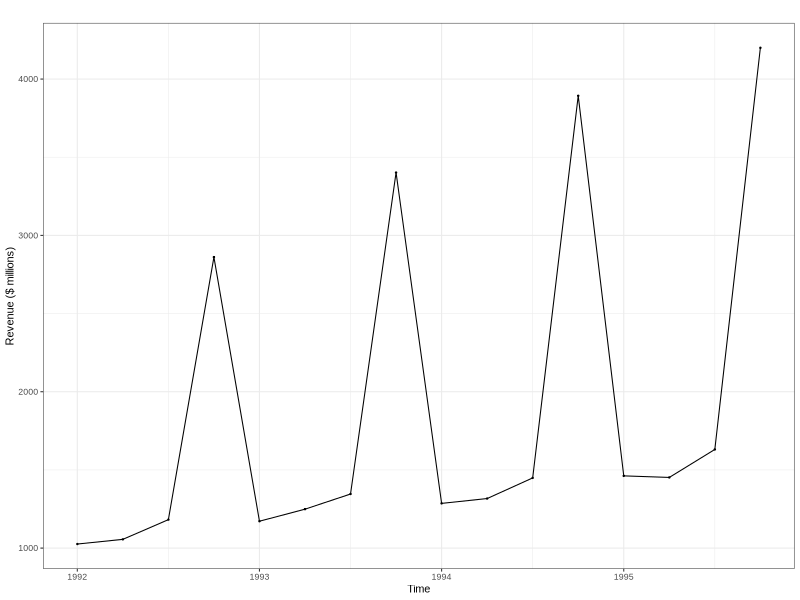

In [21]:
library(forecast)
library(IRdisplay)
tru.data <- mlba::ToysRUsRevenues
tru.ts <- ts(tru.data[, 3], start = c(1992, 1), end = c(1995, 4), freq = 4)

g <- autoplot(tru.ts) +
  geom_point(size=0.5) +
  labs(x="Time", y="Revenue ($ millions)") +
  theme_bw()

png("time_series.png", width=800, height=600)
print(g)
dev.off()
display_png(file="time_series.png")

### 📋 Time Series Visualization

**Patterns to look for**:
- **Trend**: Overall upward/downward movement
- **Seasonality**: Regular patterns (Q4 spikes for retail)
- **Outliers**: Unusual points (promotions, disruptions)

**Business application**: Forecast future revenues, plan inventory.

---

## Part 4: Principal Components Analysis (PCA)

### 🏢 Business Context: The Curse of Dimensionality

**Problem**: Your customer dataset has 100 variables. Which ones matter?

**PCA Solution**: Reduces 100 correlated variables to 5-10 **principal components** that capture most of the variation.

### How PCA Works

```
ORIGINAL DATA                    PCA TRANSFORMATION
┌─────────────────┐             ┌─────────────────┐
│ 50 correlated   │     →       │ 5 uncorrelated  │
│ variables       │             │ components      │
│ (multicollinear)│             │ (independent)   │
└─────────────────┘             └─────────────────┘
      Hard to                      Easy to
    interpret                     interpret
```

**Key benefits**:
1. **Dimension reduction**: 50 → 5 variables
2. **Removes multicollinearity**: Components are orthogonal (uncorrelated)
3. **Noise reduction**: Minor components capture noise, not signal

### Example 2: Breakfast Cereals

Start with a simple 2-variable example:

In [22]:
library(tidyverse)
cereals.df <- mlba::Cereals %>% select(calories, rating)
# compute PCs on two dimensions
pcs <- prcomp(cereals.df %>% select(calories, rating))
summary(pcs)

Importance of components:
                           PC1    PC2
Standard deviation     22.3165 8.8844
Proportion of Variance  0.8632 0.1368
Cumulative Proportion   0.8632 1.0000

### 📊 DETAILED INTERPRETATION GUIDE: PCA Summary Output

The `summary(pcs)` output is your key to understanding how much information each principal component captures. Here's how to read every element:

---

#### What You See (Example Output):

```
Importance of components:
                          PC1      PC2
Standard deviation     37.1117  5.80633
Proportion of Variance  0.9595  0.02350
Cumulative Proportion   0.9595  0.98300
```

---

#### Row-by-Row Explanation:

| Row | What It Means | How to Use It |
|-----|---------------|---------------|
| **Standard deviation** | Spread of data along this component (√eigenvalue) | Larger SD = more variance captured |
| **Proportion of Variance** | Fraction of TOTAL variance explained by THIS component | Sum of all = 1.0 (100%) |
| **Cumulative Proportion** | Running total of variance explained | How much info you keep with N components |

---

#### Step-by-Step Interpretation:

**Step 1: Read Standard Deviation**
```
                          PC1      PC2
Standard deviation     37.1117  5.80633
                         ↑         ↑
                      Very      Much
                      large     smaller

INTERPRETATION:
• PC1 captures MUCH more spread than PC2
• Eigenvalue of PC1 = 37.1² = 1377
• Eigenvalue of PC2 = 5.8² = 34

PC1 is ~40× more important than PC2!
```

**Step 2: Read Proportion of Variance**
```
                          PC1      PC2
Proportion of Variance  0.9595  0.02350
                          ↑        ↑
                        95.9%    2.4%

INTERPRETATION:
• PC1 alone captures 96% of all variation in the data
• PC2 captures only 2.4% additional
• PC1 is the "dominant" pattern; PC2 is minor
```

**Step 3: Read Cumulative Proportion**
```
                          PC1      PC2
Cumulative Proportion   0.9595  0.98300
                          ↑        ↑
                      With PC1  With PC1+PC2
                       only      together

INTERPRETATION:
• Keeping just PC1 = 96% of information retained
• Keeping PC1 + PC2 = 98.3% of information retained
• Adding PC2 gives only 2.4% more (diminishing returns!)
```

---

#### Decision Framework: How Many Components?

```
RULE OF THUMB THRESHOLDS:

Cumulative Proportion Target    Recommended Use
─────────────────────────────   ────────────────────────
≥ 0.70 (70%)                    Exploratory analysis, visualization
≥ 0.80 (80%)                    Most business applications
≥ 0.90 (90%)                    When accuracy is critical
≥ 0.95 (95%)                    Maximum precision needed
```

**For this example:**
```
PC1 alone = 96% → EXCEEDS even the 95% threshold!
DECISION: One component is sufficient for this simple 2-variable case
```

---

#### Why Is This Different from Multi-Variable PCA?

```
2-VARIABLE PCA (this example):
• Only 2 components possible
• PC1 usually dominates (>90%)
• Clear interpretation

MULTI-VARIABLE PCA (later examples):
• Many components possible
• Variance spread across more components
• Need to make trade-off decision
```

---

#### Common Patterns:

**Pattern A: One Dominant Component**
```
                   PC1    PC2    PC3    PC4
Cum. Proportion   0.85   0.92   0.96   0.99
                   ↑
               Keep PC1, maybe PC2
```

**Pattern B: Gradual Accumulation**
```
                   PC1    PC2    PC3    PC4
Cum. Proportion   0.35   0.55   0.70   0.82
                                  ↑
               Need PC1-PC3 to reach 70%
```

**Pattern C: Even Distribution**
```
                   PC1    PC2    PC3    PC4
Cum. Proportion   0.26   0.50   0.74   0.95
                              ↑
               Variables are relatively independent
               PCA may not help much
```

---

#### Business Application:

```
SCENARIO: Customer satisfaction survey with 20 questions

PCA Summary:
                   PC1    PC2    PC3    PC4
Proportion        0.45   0.18   0.12   0.08
Cumulative        0.45   0.63   0.75   0.83

BUSINESS TRANSLATION:
"We can summarize 20 satisfaction questions into 4 key dimensions
that capture 83% of customer sentiment:
• PC1 (45%): Main satisfaction driver
• PC2 (18%): Secondary factor
• PC3 (12%): Tertiary factor
• PC4 (8%): Minor factor

This reduces survey analysis from 20 variables to 4 interpretable scores."
```

---

#### Quick Reference:

```
┌────────────────────────────────────────────────────────────┐
│            PCA SUMMARY QUICK REFERENCE                      │
├────────────────────────────────────────────────────────────┤
│                                                             │
│  Standard Deviation: √(eigenvalue) - size of component     │
│  Proportion of Variance: % explained by THIS component     │
│  Cumulative Proportion: Total % with components 1 through N│
│                                                             │
│  DECISION: Keep components until cumulative ≥ 0.80 (80%)   │
│                                                             │
│  PC1 always explains MOST variance                         │
│  Each subsequent PC explains LESS                          │
│                                                             │
└────────────────────────────────────────────────────────────┘
```

### 📋 Interpreting PCA Summary

**Key metrics**:
- **Standard deviation**: Spread of data along each component
- **Proportion of Variance**: % of total variability explained
- **Cumulative Proportion**: Running total of variance explained

**Example interpretation**:
- PC1 explains 96% of variance → Captures almost all information
- PC2 explains 4% → Minor patterns, possibly noise

### Principal Component Loadings

In [23]:
pcs$rotation

,PC1,PC2
calories,0.8470535,0.5315077
rating,-0.5315077,0.8470535


### 📊 DETAILED INTERPRETATION GUIDE: PCA Loadings (Rotation Matrix)

The loadings matrix (`pcs$rotation`) is the **key to understanding what each principal component means**. It shows the "recipe" for combining original variables into components.

---

#### What You See (Example Output):

```
               PC1        PC2
calories  0.6853223  0.7282426
rating    0.7282426 -0.6853223
```

---

#### What Each Value Means:

```
LOADING = Correlation between original variable and principal component

                PC1        PC2
calories    0.6853     0.7282
              ↑          ↑
           calories   calories
           contributes contributes
           positively  positively
           to PC1      to PC2

rating      0.7282    -0.6853
              ↑          ↑
           rating     rating
           contributes contributes
           positively  NEGATIVELY
           to PC1      to PC2
```

---

#### The Mathematical "Recipe":

```
PC1 = (0.685 × calories) + (0.728 × rating)
         ↑                    ↑
      Loading for          Loading for
      calories on PC1      rating on PC1

PC2 = (0.728 × calories) + (-0.685 × rating)
         ↑                     ↑
      Positive              Negative!
      contribution          contribution
```

---

#### Interpreting Loading Patterns:

| Loading Value | Interpretation |
|---------------|----------------|
| **+0.70 to +1.00** | Strong positive contribution |
| **+0.40 to +0.70** | Moderate positive contribution |
| **+0.10 to +0.40** | Weak positive contribution |
| **-0.10 to +0.10** | Negligible contribution |
| **-0.40 to -0.10** | Weak negative contribution |
| **-0.70 to -0.40** | Moderate negative contribution |
| **-1.00 to -0.70** | Strong negative contribution |

---

#### Step-by-Step Component Interpretation:

**Step 1: Look at PC1 loadings**
```
               PC1
calories    0.6853  ← Positive (higher calories → higher PC1)
rating      0.7282  ← Positive (higher rating → higher PC1)

BOTH are positive and similar magnitude!

INTERPRETATION:
PC1 = "Overall Size/Quality" dimension
• High PC1: High calories AND high rating cereals
• Low PC1: Low calories AND low rating cereals
```

**Step 2: Look at PC2 loadings**
```
               PC2
calories    0.7282  ← Positive
rating     -0.6853  ← NEGATIVE (opposite sign!)

One positive, one negative!

INTERPRETATION:
PC2 = "Calories vs. Rating Trade-off" dimension
• High PC2: High calories but LOW rating (unhealthy cereals)
• Low PC2: Low calories but HIGH rating (healthy cereals)
```

---

#### Visual Interpretation:

```
                 High Rating
                     ↑
                     │
           Healthy   │   Indulgent
           cereals   │   cereals
   Low ←─────────────┼─────────────→ High
   Calories          │               Calories
                     │
           Diet      │   Unhealthy
           cereals   │   cereals
                     ↓
                 Low Rating

PC1 direction: ↗ (calories AND rating increase together)
PC2 direction: → then ↓ (calories up, rating down)
```

---

#### Naming Components Based on Loadings:

```
NAMING PROCESS:

1. List variables with HIGH loadings (|loading| > 0.5)
2. Note the SIGN pattern (all positive? mixed?)
3. Find the common theme
4. Give it a business-meaningful name

EXAMPLE:
PC1: calories (+0.69), rating (+0.73)
     Both positive, both describe "more" → "Overall Magnitude"
     
PC2: calories (+0.73), rating (-0.69)
     Opposite signs → "Trade-off" or "Contrast"
     → "Health Trade-off" (calories vs. healthfulness)
```

---

#### Common Loading Patterns:

```
PATTERN 1: All Same Sign (Unipolar)
─────────────────────────────────────
                PC1
Variable A     0.72
Variable B     0.68
Variable C     0.75

INTERPRETATION: "Overall Level" or "Size" component
All variables move together.

PATTERN 2: Mixed Signs (Bipolar)
─────────────────────────────────────
                PC1
Variable A     0.72
Variable B    -0.68
Variable C     0.15

INTERPRETATION: "Trade-off" or "Contrast" component
A vs. B (C doesn't matter much).

PATTERN 3: One Dominant Variable
─────────────────────────────────────
                PC1
Variable A     0.95
Variable B     0.15
Variable C     0.12

INTERPRETATION: Component ≈ Variable A
The component essentially IS that variable.
```

---

#### Business Application Example:

```
Customer Survey PCA Loadings:

               PC1      PC2
Quality       0.82     0.12
Price         0.15     0.89
Service       0.78     0.22
Speed         0.71    -0.45
Convenience   0.68    -0.38

INTERPRETATION:
PC1 = "Overall Experience" (Quality, Service, Speed, Convenience all positive)
      High PC1 = Happy customer across all dimensions

PC2 = "Value vs. Convenience Trade-off"
      Price positive, Speed/Convenience negative
      High PC2 = Price-conscious but willing to sacrifice convenience
```

---

#### Quick Reference:

```
┌────────────────────────────────────────────────────────────┐
│            PCA LOADINGS QUICK REFERENCE                     │
├────────────────────────────────────────────────────────────┤
│                                                             │
│  Loading = Weight of variable in component formula          │
│  |Loading| > 0.50 → Variable is important for component    │
│  |Loading| < 0.30 → Variable doesn't contribute much       │
│                                                             │
│  Same sign loadings → Variables move TOGETHER              │
│  Opposite sign loadings → Variables TRADE OFF              │
│                                                             │
│  ALWAYS name components for business interpretation!       │
│                                                             │
└────────────────────────────────────────────────────────────┘
```

### 📋 Understanding Loadings

**Loadings** show how original variables combine to form components:

```
PC1 = (0.685 × calories) + (0.729 × rating)
PC2 = (0.729 × calories) + (-0.685 × rating)
```

**Interpretation**:
- **High positive loading**: Variable strongly contributes in same direction
- **High negative loading**: Variable contributes in opposite direction
- **Near-zero loading**: Variable doesn't contribute to this component

### Component Scores

Each observation gets a score on each component:

In [24]:
scores <- pcs$x
head(scores, 5)

PC1,PC2
-44.921528,2.1971833
15.725265,-0.3824165
-40.149935,-5.4072123
-75.310772,12.9991256
7.041508,-5.3576857


### 📊 DETAILED INTERPRETATION GUIDE: PCA Scores

The scores (`pcs$x`) are the **new coordinates** for each observation in principal component space. These are what you use in downstream analysis.

---

#### What You See (Example Output):

```
           PC1        PC2
[1,] -17.44105  -4.988038
[2,] -11.83268   4.313234
[3,]  20.49820  11.041883
[4,] -60.82315  -2.135654
[5,] -43.78879   1.541621
```

---

#### What Each Score Means:

```
SCORE = Position of observation on that principal component

Row 1: PC1 = -17.44, PC2 = -4.99
       ↓              ↓
    This cereal     This cereal is
    is BELOW        slightly below
    average on      average on
    PC1             PC2
```

---

#### Interpreting Score Values:

| Score Value | Interpretation |
|-------------|----------------|
| **Large positive** | Observation is HIGH on this component |
| **Near zero** | Observation is AVERAGE on this component |
| **Large negative** | Observation is LOW on this component |

---

#### Connecting Scores to Original Variables:

```
RECALL: PC1 = (0.69 × calories) + (0.73 × rating)

If a cereal has PC1 = -60.82:
• This is a very NEGATIVE score
• Means LOW on both calories AND rating
• This is likely a "diet" cereal with poor taste

If a cereal has PC1 = +20.50:
• This is a POSITIVE score
• Means HIGH on both calories AND rating
• This is likely an indulgent but tasty cereal
```

---

#### Using Scores for Analysis:

**1. Identifying Extremes:**
```
Most POSITIVE PC1 score → Highest calorie + highest rated cereal
Most NEGATIVE PC1 score → Lowest calorie + lowest rated cereal

Most POSITIVE PC2 score → High calories, LOW rating (unhealthy)
Most NEGATIVE PC2 score → Low calories, HIGH rating (healthy)
```

**2. Clustering/Segmentation:**
```
Cereals with similar scores are SIMILAR products:

Cereal A: PC1 = -43.8, PC2 = 1.5
Cereal B: PC1 = -60.8, PC2 = -2.1
                ↓
    Both have negative PC1 → both are "light" cereals
    Similar PC2 → similar calorie/rating trade-off
    → These cereals COMPETE with each other!
```

**3. Downstream Modeling:**
```
USE SCORES AS NEW FEATURES:

Instead of:
  model <- lm(Sales ~ Calories + Rating + Sugar + ...)
  
Use:
  scores <- prcomp(features)$x
  model <- lm(Sales ~ PC1 + PC2 + PC3)
  
BENEFITS:
• No multicollinearity (PCs are orthogonal)
• Fewer variables (dimension reduction)
• Often better predictions (noise removed)
```

---

#### Business Application Example:

```
CUSTOMER SEGMENTATION USING SCORES:

Customer   PC1 (Spending)  PC2 (Online vs Store)
──────────────────────────────────────────────────
Alice          +2.5              +1.8
Bob            +2.3              +1.5
Carol          -1.2              +2.1
David          -1.5              -1.8
Eve            +0.1              -2.0

INTERPRETATION:
• Alice & Bob: High spenders, prefer online → "Digital VIPs"
• Carol: Low spender, prefers online → "Digital Browser"
• David: Low spender, prefers store → "Budget Store Shopper"
• Eve: Average spender, prefers store → "Traditional Shopper"

USE: Target marketing campaigns to each segment
```

---

#### Scores are Standardized:

```
IMPORTANT PROPERTY:

• Scores have MEAN = 0 (centered)
• Scores are uncorrelated with each other
• Each PC's scores have different variance (SD from summary)

This means:
• Score of 0 = Average observation
• Positive = Above average on that dimension
• Negative = Below average on that dimension
```

---

#### Quick Reference:

```
┌────────────────────────────────────────────────────────────┐
│              PCA SCORES QUICK REFERENCE                     │
├────────────────────────────────────────────────────────────┤
│                                                             │
│  Scores = New coordinates in PC space                       │
│  Each row = One observation                                │
│  Each column = One principal component                     │
│                                                             │
│  Positive score → Above average on that PC                 │
│  Negative score → Below average on that PC                 │
│  Score ≈ 0 → Average on that PC                            │
│                                                             │
│  USES:                                                      │
│  • Visualization (plot PC1 vs PC2)                         │
│  • Clustering (group similar scores)                       │
│  • Input to regression/classification models               │
│                                                             │
└────────────────────────────────────────────────────────────┘
```

### 📋 Using Component Scores

**What scores mean**:
- Each cereal has a PC1 score and PC2 score
- Use these scores as new features in downstream models
- Scores are **uncorrelated** → no multicollinearity!

### Visualizing Principal Components

agg_record_39617283 
                  2

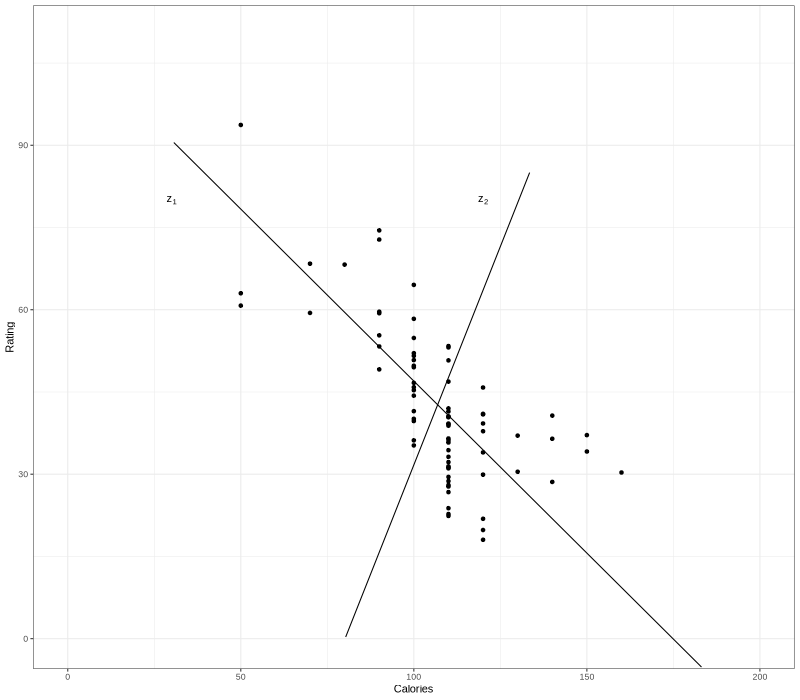

In [25]:
library(IRdisplay)

getPCaxis <- function(f, pcs, pcLabel) {
  return (data.frame(
    rbind(pcs$center + f * pcs$rotation[, pcLabel],
          pcs$center - f * pcs$rotation[, pcLabel]))
  )
}
PC1 <- getPCaxis(90, pcs, "PC1")
PC2 <- getPCaxis(50, pcs, "PC2")

g <- ggplot(cereals.df, aes(x=calories, y=rating)) +
  geom_point() +
  geom_line(data=PC1) +
  geom_line(data=PC2) +
  coord_cartesian(xlim=c(0, 200), ylim=c(0, 110)) +
  labs(x="Calories", y="Rating") +
  annotate(geom="text", x=30, y=80, label="z[1]",parse=TRUE) +
  annotate(geom="text", x=120, y=80, label="z[2]",parse=TRUE) +
  theme_bw()

png("pca_components.png", width=800, height=700)
print(g)
dev.off()
display_png(file="pca_components.png")

### 📊 DETAILED INTERPRETATION GUIDE: Reading the PCA Direction Plot

This visualization shows the principal component **directions** overlaid on the original data. Understanding this plot is key to grasping what PCA actually does.

---

#### Anatomy of the Plot:

```
      Rating
         ^
    100  │                    *
         │               *  *    * *
      80 │  z₁      *  *   *  *
         │    \   *     *    *
      60 │     \*    *  *  *
         │      \*  *    z₂
      40 │       \ *  *  /
         │        \* * /
      20 │         \  /
         │          \/
       0 └──────────────────────────→ Calories
         0    50   100   150   200
```

---

#### What Each Element Means:

| Element | Representation | Interpretation |
|---------|---------------|----------------|
| **Points (*)** | Individual cereals | Original data in 2D |
| **z₁ line** | PC1 direction | Direction of MAXIMUM variance |
| **z₂ line** | PC2 direction | Direction of REMAINING variance |
| **Intersection** | Data center | Mean of both variables |

---

#### Understanding the Directions:

**PC1 (z₁) - Primary Direction:**
```
The z₁ line points in the direction where the data
varies the MOST.

In this plot:
• z₁ points from lower-left to upper-right
• This means: as you move along z₁, BOTH calories 
  and rating change together
• High PC1 score = high calories AND high rating
```

**PC2 (z₂) - Secondary Direction:**
```
The z₂ line is PERPENDICULAR (90°) to z₁.

In this plot:
• z₂ points from upper-left to lower-right
• Moving along z₂ changes the balance of 
  calories vs. rating
• High PC2 score = high calories but LOW rating
```

---

#### The Perpendicularity Principle:

```
⚠️ KEY CONCEPT: PC1 ⊥ PC2 (always 90° apart)

Why?
• PCA finds directions that are UNCORRELATED
• Perpendicular directions guarantee zero correlation
• This is why PCA eliminates multicollinearity!

       z₁
        ↗
       /
      /
     +─────→ z₂
      
These directions form a new coordinate system
rotated from the original (Calories, Rating) axes.
```

---

#### How to Read the Rotation:

```
ORIGINAL AXES:         PCA AXES:
                       
Rating                 Rating
  ^                      ^
  │                      │   z₁
  │                      │  ↗
  │                      │ /
  │                      │/
  └─────→ Calories       └───────→ Calories
                              z₂ ↘
                              
PCA ROTATES the axes to align with 
the natural "spread" of the data.
```

---

#### Projecting Points onto Components:

```
To find a point's PC score:

1. DROP A PERPENDICULAR from the point to each PC line
2. MEASURE the distance along that line from center

Example:
                 *
                /│
               / │
              /  │← Drop perpendicular to z₁
             /   │
    ────────+────+────→ z₁
            ↑
     PC1 score = distance from center to this point
```

---

#### Variance Along Each Direction:

```
PC1 captures 96% of variance:
• Most points are SPREAD OUT along z₁
• Little clustering perpendicular to z₁

PC2 captures 4% of variance:
• Points are tightly clustered along z₂
• Not much variation remains after accounting for PC1

VISUAL CHECK:
• Wider spread along z₁ → Higher proportion of variance
• Narrower spread along z₂ → Lower proportion
```

---

#### Business Interpretation:

```
WHAT THIS PLOT TELLS US ABOUT CEREALS:

1. The main pattern (PC1 / z₁):
   • Cereals vary mostly on "overall quality"
   • Some cereals are HIGH calories + HIGH rating
   • Others are LOW calories + LOW rating
   • This is the PRIMARY way cereals differ

2. The secondary pattern (PC2 / z₂):
   • A smaller trade-off between calories and rating
   • Some healthy (low cal, high rating)
   • Some unhealthy (high cal, low rating)
   • This is SECONDARY variation

BUSINESS INSIGHT:
"The cereal market is primarily segmented by quality level,
with a smaller differentiation on the health dimension."
```

---

#### Quick Reference:

```
┌────────────────────────────────────────────────────────────┐
│         PCA DIRECTION PLOT QUICK REFERENCE                  │
├────────────────────────────────────────────────────────────┤
│                                                             │
│  Points = Original observations                            │
│  z₁ = PC1 direction (maximum variance)                     │
│  z₂ = PC2 direction (perpendicular to z₁)                  │
│                                                             │
│  Wider spread along line → That PC captures more variance  │
│  Lines are always perpendicular (90°)                      │
│                                                             │
│  PCA = Rotation of coordinate system to align with         │
│        the natural directions of data variability          │
│                                                             │
└────────────────────────────────────────────────────────────┘
```

### 📋 Reading the PCA Plot

**What you see**:
- **Points**: Individual cereals
- **Lines**: Principal component directions
- **z₁ (PC1)**: Direction of maximum variance
- **z₂ (PC2)**: Orthogonal direction (90° to PC1)

**Business insight**: PC1 captures the main pattern, PC2 captures residual variation.

---

### Full PCA on All Cereal Variables

In [26]:
# load and preprocess the data
cereals.df <- mlba::Cereals %>%
  column_to_rownames("name") %>%
  select(-c(mfr, type)) %>%
  drop_na()

pcs <- prcomp(cereals.df)
summary(pcs)

Importance of components:
                           PC1     PC2      PC3      PC4     PC5     PC6
Standard deviation     83.7641 70.9143 22.64375 19.18148 8.42323 2.09167
Proportion of Variance  0.5395  0.3867  0.03943  0.02829 0.00546 0.00034
Cumulative Proportion   0.5395  0.9262  0.96560  0.99389 0.99935 0.99968
                           PC7     PC8     PC9    PC10   PC11    PC12      PC13
Standard deviation     1.69942 0.77963 0.65783 0.37043 0.1864 0.06302 5.334e-08
Proportion of Variance 0.00022 0.00005 0.00003 0.00001 0.0000 0.00000 0.000e+00
Cumulative Proportion  0.99991 0.99995 0.99999 1.00000 1.0000 1.00000 1.000e+00

In [27]:
pcs$rotation[,1:5]

,PC1,PC2,PC3,PC4,PC5
calories,0.0779841812,0.0093115874,-0.6292057595,-0.6010214629,0.454958508
protein,-0.0007567806,-0.0088010282,-0.0010261160,0.0031999095,0.056175970
fat,-0.0001017834,-0.0026991522,-0.0161957859,-0.0252622140,-0.016098458
sodium,0.9802145422,-0.1408957901,0.1359018583,-0.0009680741,0.013948118
fiber,-0.0054127550,-0.0306807512,0.0181910456,0.0204721894,0.013605026
carbo,0.0172462607,0.0167832981,-0.0173699816,0.0259482087,0.349266966
sugars,0.0029888631,0.0002534853,-0.0977049979,-0.1154809105,-0.299066459
potass,-0.1349000039,-0.9865619808,-0.0367824989,-0.0421757390,-0.047150529
vitamins,0.0942933187,-0.0167288404,-0.6919777623,0.7141179984,-0.037008623
shelf,-0.0015414195,-0.0043603994,-0.0124888415,0.0056471836,-0.007876459


### 📊 DETAILED INTERPRETATION GUIDE: Multi-Variable PCA Loadings

When you have many variables, interpreting loadings requires a systematic approach. Here's how to read and interpret a larger loadings matrix.

---

#### What You See (Example Output):

```
              PC1      PC2      PC3      PC4      PC5
calories -0.3685   0.0844  -0.0449   0.2891   0.3152
protein   0.1168   0.4712  -0.3299   0.0133   0.5478
fat      -0.3698   0.0102  -0.1069   0.2181  -0.0632
sodium   -0.3638  -0.0776  -0.0458  -0.4132  -0.2118
fiber     0.3148   0.2713   0.3660   0.2251  -0.3507
carbo    -0.2440   0.4231   0.3632  -0.2766  -0.3161
sugars   -0.3635  -0.1656  -0.0746   0.2131   0.3315
potass    0.3178   0.3283   0.0858  -0.2148  -0.1688
vitamins -0.1561  -0.0179  -0.5999   0.0406  -0.4166
shelf     0.0085  -0.5477   0.0682  -0.0025  -0.0614
weight   -0.2149   0.1648  -0.4329  -0.6135   0.0798
cups      0.2575  -0.1899   0.1889   0.2507   0.0927
rating    0.2051   0.0908   0.1050  -0.0741  -0.2626
```

---

#### Step-by-Step Interpretation Process:

**Step 1: Focus on ONE component at a time**
```
Start with PC1 (explains most variance)

Identify HIGH loadings (|value| > 0.30):

              PC1
calories   -0.3685  ← HIGH NEGATIVE
fat        -0.3698  ← HIGH NEGATIVE
sodium     -0.3638  ← HIGH NEGATIVE
fiber       0.3148  ← HIGH POSITIVE
sugars     -0.3635  ← HIGH NEGATIVE
potass      0.3178  ← HIGH POSITIVE
```

**Step 2: Group by sign**
```
NEGATIVE loadings (high values → low PC1):
• calories, fat, sodium, sugars
  → "Bad stuff" - unhealthy attributes

POSITIVE loadings (high values → high PC1):
• fiber, potassium
  → "Good stuff" - healthy attributes

PATTERN: PC1 = "Healthfulness" dimension
         High PC1 = Healthy cereal
         Low PC1 = Unhealthy cereal
```

**Step 3: Repeat for PC2**
```
              PC2
protein     0.4712  ← HIGH POSITIVE
carbo       0.4231  ← HIGH POSITIVE
potass      0.3283  ← MODERATE POSITIVE
shelf      -0.5477  ← HIGH NEGATIVE

PATTERN: PC2 = "Nutritional density vs. Marketing position"
         High PC2 = High protein/carbs, lower shelf
         (Quality products placed less prominently?)
```

---

#### Creating an Interpretation Table:

| PC | Key Variables (+) | Key Variables (-) | Interpretation |
|----|-------------------|-------------------|----------------|
| **PC1** | fiber, potassium | calories, fat, sodium, sugars | "Healthfulness" |
| **PC2** | protein, carbs | shelf position | "Nutritional Content" |
| **PC3** | fiber, carbs | vitamins, weight | "Bulk/Volume" |
| **PC4** | calories, sugars | sodium, weight | "Sweet vs. Salty" |
| **PC5** | protein | vitamins, fiber | "Protein Source" |

---

#### The "Naming" Framework:

```
HOW TO NAME A PRINCIPAL COMPONENT:

1. List variables with |loading| > 0.30
2. Separate into positive and negative groups
3. Find what the POSITIVE group has in common
4. Find what the NEGATIVE group has in common
5. Name as "[Positive theme] vs. [Negative theme]"
   or just the dominant theme if one side is stronger

EXAMPLES:
• fiber(+), potassium(+) vs. sugar(-), fat(-), sodium(-)
  → "Healthfulness" or "Healthy vs. Unhealthy"

• protein(+), carbs(+) vs. shelf(-)
  → "Nutritional Content" (shelf doesn't fit a theme)
```

---

#### Handling "Mixed" or "Unclear" Components:

```
When a component is hard to interpret:

OPTION 1: It captures complex interactions
          → Name it descriptively: "Interaction Component"
          
OPTION 2: It captures noise
          → Consider dropping this component
          
OPTION 3: The data doesn't have clear structure
          → PCA may not be the right tool

CHECK: If cumulative variance is low (< 60%) with 
       several components, your data may not have
       strong underlying dimensions.
```

---

#### Visual Approach - Loadings Heatmap Pattern:

```
           PC1    PC2    PC3    PC4    PC5
          ────── ────── ────── ────── ──────
calories  [■■■]  [   ]  [   ]  [ ■ ]  [ ■ ]
protein   [   ]  [■■■]  [■■ ]  [   ]  [■■■]
fat       [■■■]  [   ]  [   ]  [ ■ ]  [   ]
sodium    [■■■]  [   ]  [   ]  [■■■]  [■■ ]
fiber     [■■■]  [ ■ ]  [■■■]  [ ■ ]  [■■■]
...

■ = High loading (|value| > 0.30)
  = Low loading (|value| < 0.30)

LOOK FOR: Blocks of ■ that form meaningful groups
```

---

#### Business Communication Template:

```
"Our PCA of cereal attributes revealed [N] key dimensions:

1. HEALTHFULNESS (PC1, 35% of variance):
   Distinguishes healthy cereals (high fiber, potassium)
   from unhealthy options (high sugar, fat, sodium)

2. NUTRITIONAL CONTENT (PC2, 18% of variance):
   Separates protein-rich cereals from others

3. [Continue for each meaningful component...]

Together, these [N] dimensions capture [X%] of the total
variation in our cereal dataset, simplifying our 13 
attributes into interpretable factors."
```

---

#### Quick Reference:

```
┌────────────────────────────────────────────────────────────┐
│       MULTI-VARIABLE LOADINGS QUICK REFERENCE               │
├────────────────────────────────────────────────────────────┤
│                                                             │
│  1. Look at ONE PC column at a time                        │
│  2. Find variables with |loading| > 0.30                   │
│  3. Group by positive vs. negative                         │
│  4. Find the common theme                                  │
│  5. Name the component                                     │
│                                                             │
│  If no clear theme → May be noise or interaction           │
│  If all loadings small → Variable doesn't load on this PC  │
│                                                             │
└────────────────────────────────────────────────────────────┘
```

### 📋 Interpreting Multi-Variable PCA

**How many components to keep?**

| Rule | Criterion |
|------|----------|
| **Cumulative variance** | Keep components explaining 80-90% of variance |
| **Scree plot** | Keep components before the "elbow" |
| **Eigenvalue > 1** | Kaiser criterion (for standardized data) |

**Business decision**: More components = more accuracy, but less interpretability.

### ⚠️ Normalizing Data for PCA

**Critical**: If variables have different scales, PCA will be dominated by large-scale variables!

Example:
- Calories (range: 50-150)
- Sodium (range: 0-300)
- Protein (range: 1-6)

Sodium will dominate PC1 just because of its scale, not its importance.

**Solution**: Use `scale. = TRUE` to standardize all variables:

In [28]:
# Use function prcomp() with scale. = T to run PCA on normalized data
pcs.cor <- prcomp(cereals.df, scale. = T)

summary(pcs.cor)

Importance of components:
                          PC1    PC2    PC3     PC4    PC5     PC6     PC7
Standard deviation     1.9062 1.7743 1.3818 1.00969 0.9947 0.84974 0.81946
Proportion of Variance 0.2795 0.2422 0.1469 0.07842 0.0761 0.05554 0.05166
Cumulative Proportion  0.2795 0.5217 0.6685 0.74696 0.8231 0.87861 0.93026
                           PC8     PC9    PC10    PC11    PC12      PC13
Standard deviation     0.64515 0.56192 0.30301 0.25194 0.13897 1.499e-08
Proportion of Variance 0.03202 0.02429 0.00706 0.00488 0.00149 0.000e+00
Cumulative Proportion  0.96228 0.98657 0.99363 0.99851 1.00000 1.000e+00

In [29]:
pcs.cor$rotation[,1:5]

,PC1,PC2,PC3,PC4,PC5
calories,0.29954236,0.3931479,-0.114857453,0.20435870,0.20389885
protein,-0.30735632,0.1653233,-0.277281953,0.30074318,0.31974897
fat,0.03991542,0.3457243,0.204890102,0.18683311,0.58689327
sodium,0.18339651,0.1372205,-0.389431009,0.12033726,-0.33836424
fiber,-0.45349036,0.1798119,-0.069766079,0.03917361,-0.25511906
carbo,0.19244902,-0.1494483,-0.562452458,0.08783547,0.18274252
sugars,0.22806849,0.3514345,0.355405174,-0.02270716,-0.31487243
potass,-0.40196429,0.3005442,-0.067620183,0.09087843,-0.14836048
vitamins,0.11598020,0.1729092,-0.387858660,-0.60411064,-0.04928672
shelf,-0.17126336,0.2650503,0.001531036,-0.63887859,0.32910135


### 📋 Normalized vs. Non-Normalized PCA

**When to normalize:**
- Variables on different scales (always normalize!)
- You care about **correlations**, not raw variances

**When NOT to normalize:**
- All variables in same units (e.g., all are percentages)
- Scale differences are meaningful (e.g., larger variance = more important)

**Best practice**: Almost always use `scale. = TRUE` in business applications.

### Visualizing Principal Components

Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


agg_record_182985085 
                   2

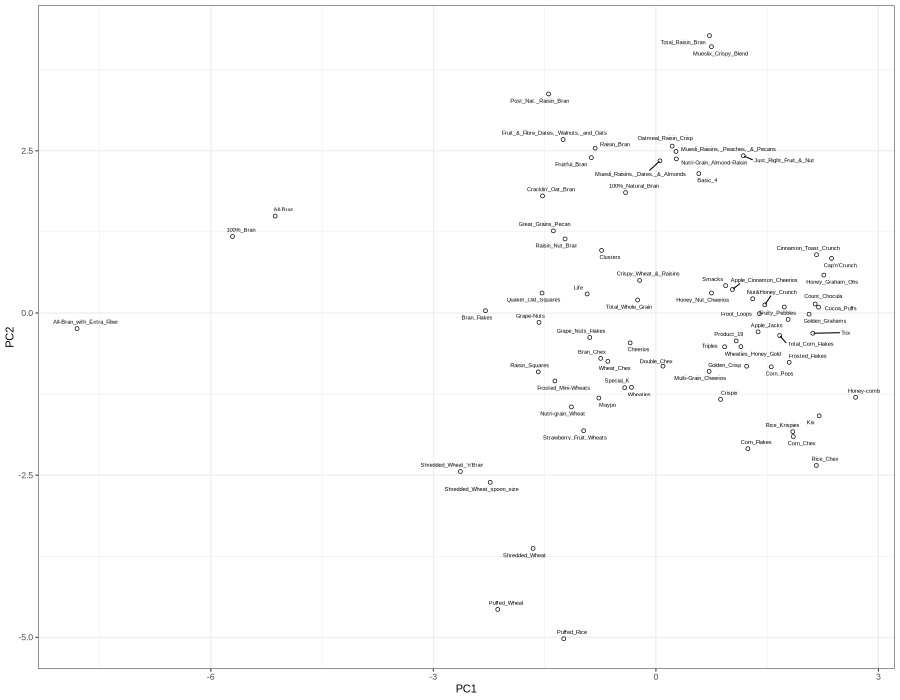

In [30]:
library(ggrepel)
library(IRdisplay)

g <- ggplot(data.frame(pcs.cor$x), aes(x=PC1, y=PC2, label=rownames(pcs.cor$x))) +
  geom_point(shape=21) +
  geom_text_repel(size=2, max.overlaps=7) +
  theme_bw()

png("pca_biplot.png", width=900, height=700)
print(g)
dev.off()
display_png(file="pca_biplot.png")

### 📊 DETAILED INTERPRETATION GUIDE: Reading the PCA Biplot (Scatter Plot)

The biplot displays individual observations in principal component space. This visualization reveals **patterns, clusters, and outliers** in your data.

---

#### Anatomy of the Plot:

```
         PC2
          ^
    3     │
          │   Grape-Nuts●     ●All-Bran
    2     │        
          │                ●All-Bran-Extra-Fiber
    1     │    ●Cheerios
          │         ●Life
    0  ───┼──────────●────────────────────→ PC1
          │        Kix●    ●Special-K
   -1     │
          │  ●Frosted-Flakes    
   -2     │             ●Cap'n'Crunch
          │                    ●Lucky-Charms
   -3     │
```

---

#### What Each Element Means:

| Element | Representation | Interpretation |
|---------|---------------|----------------|
| **Points** | Individual observations | Each cereal is one point |
| **X-axis (PC1)** | First principal component | Primary pattern in data |
| **Y-axis (PC2)** | Second principal component | Secondary pattern |
| **Labels** | Observation names | Identify specific cases |
| **Distance from origin** | How "extreme" the observation is | Far = unusual combination |

---

#### Step-by-Step Interpretation:

**Step 1: Understand the axes**
```
Given the loadings we interpreted earlier:
• PC1 (x-axis) = "Healthfulness"
  - RIGHT = Healthier (high fiber, potassium)
  - LEFT = Less healthy (high sugar, fat)
  
• PC2 (y-axis) = "Nutritional Content"
  - UP = High protein/carbs
  - DOWN = Low protein/carbs
```

**Step 2: Locate individual observations**
```
All-Bran: Far RIGHT, High UP
→ Very healthy (high PC1) + High nutrition (high PC2)
→ This is a health-focused, nutrient-dense cereal

Lucky-Charms: Far LEFT, Low DOWN
→ Less healthy (low PC1) + Low nutrition (low PC2)
→ This is a kid-oriented sugary cereal
```

**Step 3: Identify clusters**
```
CLUSTER 1 (Right side): Health cereals
• All-Bran, Grape-Nuts, All-Bran-Extra-Fiber
→ These cereals compete in the "health" segment

CLUSTER 2 (Left side): Sugary cereals
• Frosted-Flakes, Cap'n'Crunch, Lucky-Charms
→ These cereals compete in the "indulgent" segment

CLUSTER 3 (Middle): Mainstream cereals
• Cheerios, Life, Kix, Special-K
→ These cereals are middle-of-the-road options
```

**Step 4: Identify outliers**
```
Look for points FAR from others:

If a cereal is isolated → Unique positioning
• Could be a niche product
• Could be an opportunity (market gap)
• Could be a data error (check the observation)
```

---

#### Quadrant Analysis:

```
                        High PC2
                   (High Nutrition)
                         ↑
           ┌─────────────┼─────────────┐
           │  Healthy    │  Healthy    │
           │  BUT Low    │  AND High   │
    Low    │  Nutrition  │  Nutrition  │  High
    PC1 ←──┼─────────────┼─────────────┼──→ PC1
(Unhealthy)│  Unhealthy  │  Unhealthy  │(Healthy)
           │  AND Low    │  BUT High   │
           │  Nutrition  │  Nutrition  │
           └─────────────┼─────────────┘
                         ↓
                    Low PC2
               (Low Nutrition)

Each quadrant represents a different product positioning:
• Top-Right: Premium health products
• Top-Left: Nutrient-fortified indulgences
• Bottom-Right: Light/diet products
• Bottom-Left: Basic sugary cereals
```

---

#### Distance Interpretation:

```
DISTANCE FROM ORIGIN (0,0):

√(PC1² + PC2²) = "Uniqueness" score

Far from origin:
• More extreme on one or both dimensions
• More differentiated product
• Could be segment leader OR outlier

Near origin:
• Average on both dimensions
• "Me too" product positioning
• Competing in crowded middle market
```

---

#### Business Applications:

**1. Competitive Analysis:**
```
"Which cereals compete with ours?"
→ Look for cereals NEAR yours on the plot
→ Those are your direct competitors

"What makes us different?"
→ Your distance and direction from competitors
→ Highlight attributes that move you in that direction
```

**2. Market Gap Analysis:**
```
"Where are there opportunities?"
→ Look for EMPTY areas on the plot
→ These are underserved positioning options

Example: If no cereals are in top-left quadrant
→ Opportunity for "nutrient-fortified treat" cereal
```

**3. Outlier Investigation:**
```
"Why is this cereal so different?"
→ Check outliers' original attribute values
→ May reveal unique formula or data errors
```

---

#### Connecting Plot to Loadings:

```
TO MOVE A PRODUCT IN A DIRECTION ON THE PLOT:

Want to move RIGHT (increase PC1)?
→ Check PC1 loadings
→ Increase variables with positive loadings (fiber, potassium)
→ Decrease variables with negative loadings (sugar, fat)

Want to move UP (increase PC2)?
→ Check PC2 loadings
→ Increase variables with positive loadings (protein, carbs)
→ Decrease variables with negative loadings (shelf position)
```

---

#### Quick Reference:

```
┌────────────────────────────────────────────────────────────┐
│            PCA BIPLOT QUICK REFERENCE                       │
├────────────────────────────────────────────────────────────┤
│                                                             │
│  Each POINT = One observation                              │
│  X-axis = PC1 score (primary dimension)                    │
│  Y-axis = PC2 score (secondary dimension)                  │
│                                                             │
│  CLOSE points → Similar observations                       │
│  FAR points → Different observations                       │
│  CLUSTERS → Market segments                                │
│  GAPS → Market opportunities                               │
│  OUTLIERS → Unique cases (investigate!)                    │
│                                                             │
│  Connect to LOADINGS to understand WHAT makes              │
│  observations similar or different!                        │
│                                                             │
└────────────────────────────────────────────────────────────┘
```

### 📋 Interpreting the PCA Biplot

**What you see**:
- Each **point** = one cereal
- **X-axis (PC1)**: First principal component (highest variance)
- **Y-axis (PC2)**: Second principal component
- **Proximity**: Cereals close together are similar

**Business applications**:
- **Market segmentation**: Clusters of similar products
- **Outlier detection**: Points far from center
- **Competitive analysis**: Which products compete directly?

---

## Part 5: Using PCA for Downstream Modeling

### 🏢 Business Context: PCA as Preprocessing

**Workflow**:
1. Run PCA to reduce 50 variables to 10 components
2. Use component scores as features in classification/regression
3. Benefit from uncorrelated, de-noised features

### Example: Wine Classification

In [31]:
wine.df <- mlba::Wine %>% select(-Type)
pcs.cor <- prcomp(wine.df, scale. = TRUE)
summary(pcs.cor)

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.169 1.5802 1.2025 0.95863 0.92370 0.80103 0.74231
Proportion of Variance 0.362 0.1921 0.1112 0.07069 0.06563 0.04936 0.04239
Cumulative Proportion  0.362 0.5541 0.6653 0.73599 0.80162 0.85098 0.89337
                           PC8     PC9   PC10    PC11    PC12    PC13
Standard deviation     0.59034 0.53748 0.5009 0.47517 0.41082 0.32152
Proportion of Variance 0.02681 0.02222 0.0193 0.01737 0.01298 0.00795
Cumulative Proportion  0.92018 0.94240 0.9617 0.97907 0.99205 1.00000

In [32]:
pcs.cor$rotation[,1:4]

,PC1,PC2,PC3,PC4
Alcohol,-0.144329395,-0.483651548,-0.20738262,-0.01785630
Malic_Acid,0.245187580,-0.224930935,0.08901289,0.53689028
Ash,0.002051061,-0.316068814,0.62622390,-0.21417556
Ash_Alcalinity,0.239320405,0.010590502,0.61208035,0.06085941
Magnesium,-0.141992042,-0.299634003,0.13075693,-0.35179658
Total_Phenols,-0.394660845,-0.065039512,0.14617896,0.19806835
Flavanoids,-0.422934297,0.003359812,0.15068190,0.15229479
Nonflavanoid_Phenols,0.298533103,-0.028779488,0.17036816,-0.20330102
Proanthocyanins,-0.313429488,-0.039301722,0.14945431,0.39905653
Color_Intensity,0.088616705,-0.529995672,-0.13730621,0.06592568


### 📋 Deciding How Many Components to Use

**Example decision**:
- Original: 13 variables
- PC1-PC4 explain 73% of variance
- PC1-PC6 explain 85% of variance

**Trade-off**:
- Fewer components → Simpler model, less overfitting, easier interpretation
- More components → Better accuracy, captures more patterns

**Common practice**: Start with components explaining 80-85% of variance.

### 🎯 Next Steps: Classification/Regression

After PCA, you would:
1. Extract component scores: `pcs.cor$x`
2. Use them in models: `lm()`, `glm()`, `randomForest()`, etc.
3. Evaluate performance on holdout set

---

## Summary: Key Takeaways

### 🔧 Essential Functions Reference

#### Data Summaries
| Task | Function | Output |
|------|----------|--------|
| All statistics | `summary(df)` | Min, Q1, median, mean, Q3, max |
| Mean | `mean(x)` | Average value |
| Standard deviation | `sd(x)` | Measure of spread |
| Correlation matrix | `cor(df)` | All pairwise correlations |

#### Aggregation
| Task | Function | Business Use |
|------|----------|-------------|
| Frequency table | `table(x)` | Count by category |
| Group summaries | `group_by() %>% summarise()` | Averages by segment |
| Pivot table | `spread()` or `cast()` | Cross-tabulation |

#### Principal Component Analysis
| Task | Function | Notes |
|------|----------|-------|
| Run PCA | `prcomp(df, scale.=TRUE)` | Always normalize! |
| Summary | `summary(pcs)` | Variance explained |
| Loadings | `pcs$rotation` | Variable contributions |
| Scores | `pcs$x` | New feature values |

---

### 🎯 Best Practices Checklist

✅ **Always check for missing values** before analysis
✅ **Compute correlations** to detect multicollinearity
✅ **Normalize data** (`scale.=TRUE`) before PCA unless all variables are on same scale
✅ **Check variance explained** to decide how many components to keep
✅ **Document your decisions** (why 5 components? why normalize?)
✅ **Visualize results** for stakeholders (biplots, scree plots)

---

### 🏢 Business Value Summary

| Technique | Business Problem | Value |
|-----------|------------------|-------|
| **Summary statistics** | "What does our data look like?" | Quick insights, data quality checks |
| **Pivot tables** | "How do metrics vary by segment?" | Targeted strategies, resource allocation |
| **PCA** | "Which variables really matter?" | Simplified models, reduced storage costs |
| **Dimension reduction** | "Too many features for model" | Prevent overfitting, faster computation |

---

### 📚 Connection to Other Modules

- **Module 1.1**: Use PCA components as features in regression
- **Module 2.1**: Test differences between PCA-derived groups (ANOVA)
- **Module 3**: Advanced dimension reduction (t-SNE, UMAP)
- **Module 4**: Factor Analysis (similar to PCA but different assumptions)
- **Module 5**: Cluster on PCA scores instead of raw variables

---

**Next Steps**: Apply PCA to your own high-dimensional datasets. Start with `scale.=TRUE` and keep components explaining 80-90% of variance!

---

## 📋 COMPREHENSIVE INTERPRETATION QUICK REFERENCE

This section provides a single-page reference for interpreting all outputs covered in this module.

---

### Summary Statistics Interpretation

#### summary() Output:
```
Min.    → Smallest value (check for data errors)
1st Qu. → 25th percentile (Q1)
Median  → 50th percentile (robust "typical" value)
Mean    → Average (sensitive to outliers)
3rd Qu. → 75th percentile (Q3)
Max.    → Largest value (check for outliers)
```

**Key Diagnostic:** If Mean >> Median → Right-skewed data, use Median

---

### Correlation Matrix Interpretation

| r Value | Strength | Action |
|---------|----------|--------|
| **0.90 to 1.00** | Very strong | Variables are redundant - remove one |
| **0.70 to 0.89** | Strong | Consider multicollinearity |
| **0.40 to 0.69** | Moderate | Notable relationship |
| **< 0.40** | Weak/None | Independent variables |

**Key Rule:** |r| > 0.80 between predictors = multicollinearity problem!

---

### Pivot Table Interpretation

```
STRUCTURE:
┌──────────────────────────────────┐
│           COLUMNS (Group B)       │
│  ROWS     Value1  Value2  (all)  │
│  (Group A)                       │
│  Cat1     [cell]  [cell]  [row]  │
│  Cat2     [cell]  [cell]  [row]  │
│  (all)    [col]   [col]   [tot]  │
└──────────────────────────────────┘

[cell] = Value for specific A×B combination
[row]  = Row margin (all columns for this row)
[col]  = Column margin (all rows for this column)
[tot]  = Grand total/average
NA     = No observations for that combination
```

---

### PCA Summary Interpretation

```
                          PC1      PC2      PC3
Standard deviation      2.85     1.42     0.98     ← √eigenvalue
Proportion of Variance  0.45     0.18     0.12     ← % this PC explains
Cumulative Proportion   0.45     0.63     0.75     ← Total % with 1,2,3 PCs
```

**Decision Rule:** Keep components until Cumulative ≥ 0.80 (80%)

---

### PCA Loadings Interpretation

| Loading Value | Contribution |
|---------------|--------------|
| **> 0.70** | Strong positive |
| **0.40 to 0.70** | Moderate positive |
| **-0.40 to 0.40** | Weak/negligible |
| **-0.70 to -0.40** | Moderate negative |
| **< -0.70** | Strong negative |

**Naming Components:**
1. Find variables with |loading| > 0.40
2. Group by positive vs. negative
3. Find common theme
4. Create business-meaningful name

---

### PCA Scores Interpretation

```
Positive score → Above average on that dimension
Score ≈ 0      → Average on that dimension  
Negative score → Below average on that dimension
```

**Uses:** Clustering, visualization, input to downstream models

---

### PCA Biplot Interpretation

```
CLOSE points    → Similar observations
FAR points      → Different observations
CLUSTERS        → Market segments / groups
GAPS            → Market opportunities
OUTLIERS        → Unique cases (investigate!)
Distance from 0 → How "extreme" the observation is
```

---

### Common Mistakes to Avoid

| Method | Common Mistake | Correct Approach |
|--------|----------------|------------------|
| **summary()** | Only looking at mean | Compare mean vs median for skewness |
| **Correlation** | Ignoring high correlations | Check for multicollinearity (r > 0.8) |
| **Pivot Tables** | Ignoring NA cells | Note what combinations are missing |
| **PCA** | Not normalizing | Use `scale. = TRUE` for different scales |
| **Loadings** | Not naming components | Always create interpretable names |
| **Scores** | Using all components | Keep only what's needed (80% rule) |
| **Biplot** | Over-interpreting distances | Focus on relative positions |

---

### When to Use Which Technique

| Your Goal | Use This |
|-----------|----------|
| Understand a single variable | `summary()`, histogram |
| Understand variable relationships | Correlation matrix |
| Compare groups on a metric | Pivot table, group_by + summarize |
| Reduce many correlated variables | PCA |
| Find similar observations | PCA biplot, clustering |
| Build predictive model with multicollinearity | PCA → use scores as features |

---

### Business Presentation Templates

**For Summary Statistics:**
> "The typical [metric] is [median], with 50% of values falling between [Q1] and [Q3]. The mean ([mean]) differs from the median, indicating [right/left]-skewed data."

**For Correlation:**
> "We found strong correlations (r > 0.7) between [var1] and [var2], suggesting these measure similar underlying concepts. We recommend [action]."

**For PCA:**
> "We reduced [N] variables to [K] principal components, capturing [X%] of the original information. The first component represents '[PC1 name]', explaining [X%] of variation."

**For Biplot:**
> "The PCA map reveals [N] distinct clusters of [observations]. [Observation A] and [Observation B] are positioned close together, indicating similar [attribute] profiles."